### Data prapareration and Data cleaning

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline 
import scipy as sp
import scipy.stats as stats

In [78]:
accident_data=pd.read_csv('/Users/Celia/Desktop/Data_Assurance_Data_Test_S/Dataset.csv')

In [79]:
accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570609 entries, 0 to 570608
Data columns (total 28 columns):
ID                                             570609 non-null int64
Location_Easting_OSGR                          570582 non-null float64
Location_Northing_OSGR                         570582 non-null float64
Longitude                                      570582 non-null float64
Latitude                                       570582 non-null float64
Police_Force                                   570609 non-null int64
Accident_Severity                              570609 non-null int64
Number_of_Vehicles                             570609 non-null int64
Number_of_Casualties                           570609 non-null int64
Date                                           570609 non-null object
Day_of_Week                                    570609 non-null int64
Time                                           570578 non-null object
Local_Authority_(District)                     5706

In [80]:
accident_data.rename(columns={'Pedestrian_Crossing-Physical_Facilities':'Ped_Cross_Physical',
                          'Pedestrian_Crossing-Human_Control':'Ped_Cross_Human',
                          'Did_Police_Officer_Attend_Scene_of_Accident':'Police_Officer_Attend'}, inplace=True)

In [81]:
accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570609 entries, 0 to 570608
Data columns (total 28 columns):
ID                            570609 non-null int64
Location_Easting_OSGR         570582 non-null float64
Location_Northing_OSGR        570582 non-null float64
Longitude                     570582 non-null float64
Latitude                      570582 non-null float64
Police_Force                  570609 non-null int64
Accident_Severity             570609 non-null int64
Number_of_Vehicles            570609 non-null int64
Number_of_Casualties          570609 non-null int64
Date                          570609 non-null object
Day_of_Week                   570609 non-null int64
Time                          570578 non-null object
Local_Authority_(District)    570609 non-null int64
Local_Authority_(Highway)     570609 non-null object
1st_Road_Class                570609 non-null int64
1st_Road_Number               570609 non-null int64
Road_Type                     570609 non-null 

In [82]:
#check which columns contain missing values
accident_data.apply(lambda x: sum(x.isnull()))

ID                                0
Location_Easting_OSGR            27
Location_Northing_OSGR           27
Longitude                        27
Latitude                         27
Police_Force                      0
Accident_Severity                 0
Number_of_Vehicles                0
Number_of_Casualties              0
Date                              0
Day_of_Week                       0
Time                             31
Local_Authority_(District)        0
Local_Authority_(Highway)         0
1st_Road_Class                    0
1st_Road_Number                   0
Road_Type                         0
Speed_limit                       0
Junction_Detail                   0
Junction_Control                  0
2nd_Road_Class                    0
2nd_Road_Number                   0
Ped_Cross_Human                   0
Ped_Cross_Physical                0
Light_Conditions                  0
Urban_or_Rural_Area               0
Police_Officer_Attend             0
LSOA_of_Accident_Location   

In [83]:
#Drop missing data
accident_data = accident_data.dropna()
#-1 should be imputed to NaN to be recognized as missing
accident_data.replace(-1, np.nan, inplace=True)
accident_data = accident_data.dropna()

In [84]:
#check if we clean missing value
accident_data.apply(lambda x: sum(x.isnull()))

ID                            0
Location_Easting_OSGR         0
Location_Northing_OSGR        0
Longitude                     0
Latitude                      0
Police_Force                  0
Accident_Severity             0
Number_of_Vehicles            0
Number_of_Casualties          0
Date                          0
Day_of_Week                   0
Time                          0
Local_Authority_(District)    0
Local_Authority_(Highway)     0
1st_Road_Class                0
1st_Road_Number               0
Road_Type                     0
Speed_limit                   0
Junction_Detail               0
Junction_Control              0
2nd_Road_Class                0
2nd_Road_Number               0
Ped_Cross_Human               0
Ped_Cross_Physical            0
Light_Conditions              0
Urban_or_Rural_Area           0
Police_Officer_Attend         0
LSOA_of_Accident_Location     0
dtype: int64

In [85]:
#Drop missing data 
# accident_data=accident_data[accident_data.Light_Conditions !=-1]
# accident_data=accident_data[accident_data.Police_Officer_Attend !=-1]
# accident_data=accident_data[accident_data.Junction_Detail !=-1]
# accident_data=accident_data[accident_data.Ped_Cross_Physical !=-1]
# accident_data=accident_data[accident_data.Junction_Control !=-1]
# accident_data=accident_data[accident_data.Road_Type !=-1]
# accident_data=accident_data[accident_data.Ped_Cross_Human !=-1]


In [86]:
accident_data['Police_Officer_Attend'] = accident_data['Police_Officer_Attend'].replace(3,2)
accident_data['Police_Officer_Attend'] = accident_data['Police_Officer_Attend'].astype('int')

In [87]:
accident_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324130 entries, 0 to 562143
Data columns (total 28 columns):
ID                            324130 non-null int64
Location_Easting_OSGR         324130 non-null float64
Location_Northing_OSGR        324130 non-null float64
Longitude                     324130 non-null float64
Latitude                      324130 non-null float64
Police_Force                  324130 non-null int64
Accident_Severity             324130 non-null int64
Number_of_Vehicles            324130 non-null int64
Number_of_Casualties          324130 non-null int64
Date                          324130 non-null object
Day_of_Week                   324130 non-null int64
Time                          324130 non-null object
Local_Authority_(District)    324130 non-null int64
Local_Authority_(Highway)     324130 non-null object
1st_Road_Class                324130 non-null int64
1st_Road_Number               324130 non-null int64
Road_Type                     324130 non-null 

In [88]:
# Extract month from date
def month_of_date(date):
    dmyyyy = datetime.strptime(date, '%d/%m/%y')
    return int(datetime.strftime(dmyyyy, '%m'))


accident_data['Month_of_year']=accident_data['Date'].apply(month_of_date)


In [89]:
# Extract hour from time
def hour_from_time(time):
    try:
        hhmm = datetime.strptime(time,'%H:%M')
        return int(datetime.strftime(hhmm, '%H'))
    except:
        # Some times are nan
        return 0

accident_data['Hour_of_Day']=accident_data['Time'].apply(hour_from_time)


In [138]:
# Extract year from date
def month_of_date(date):
    dmyyyy = datetime.strptime(date, '%d/%m/%y')
    return int(datetime.strftime(dmyyyy, '%y'))


accident_data['Year']=accident_data['Date'].apply(month_of_date)

In [90]:
#Drop 'Date' and 'Time' cols
accident_data = accident_data.drop(['Time'],axis=1)

In [139]:
accident_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324130 entries, 0 to 562143
Data columns (total 30 columns):
ID                            324130 non-null int64
Location_Easting_OSGR         324130 non-null float64
Location_Northing_OSGR        324130 non-null float64
Longitude                     324130 non-null float64
Latitude                      324130 non-null float64
Police_Force                  324130 non-null int64
Accident_Severity             324130 non-null int64
Number_of_Vehicles            324130 non-null int64
Number_of_Casualties          324130 non-null int64
Date                          324130 non-null object
Day_of_Week                   324130 non-null int64
Local_Authority_(District)    324130 non-null int64
Local_Authority_(Highway)     324130 non-null object
1st_Road_Class                324130 non-null int64
1st_Road_Number               324130 non-null int64
Road_Type                     324130 non-null int64
Speed_limit                   324130 non-null i

##### save new file after cleaning

In [140]:
Dataset_csv = accident_data.to_csv(r'/Users/Celia/Desktop/Data_Assurance_Data_Test_S/Dataset_v1.csv',
                                 index=None,header=True)

## Total number of accident by severity

In [17]:
accident_data.groupby('Accident_Severity').size().reset_index(name = 'counts')

,Accident_Severity,counts
0,1,2166
1,2,40942
2,3,281022


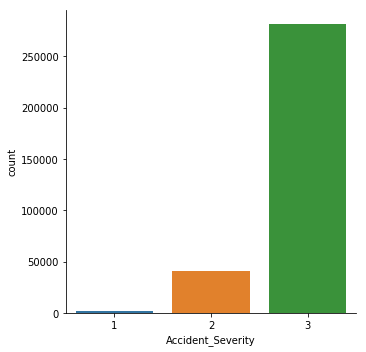

In [18]:
sns.catplot(x = "Accident_Severity",kind = "count",data = accident_data)

## Accident Severity by speed limit

In [22]:
#Check the number of acciedent within different speed limit
df = accident_data.groupby(['Accident_Severity','Speed_limit']).size().reset_index(name ='counts')
df = df.pivot_table(index ='Speed_limit',
                    columns ='Accident_Severity',
                     values ='counts')
df

Accident_Severity,1,2,3
Speed_limit,,,
0,NaN,NaN,1.0
20,23.0,1067.0,6334.0
30,1175.0,29097.0,212998.0
40,253.0,3691.0,23861.0
50,115.0,1405.0,8424.0
60,473.0,4648.0,21526.0
70,127.0,1034.0,7878.0


Text(0.5, 1.0, 'Total number of accidents by speed limit')

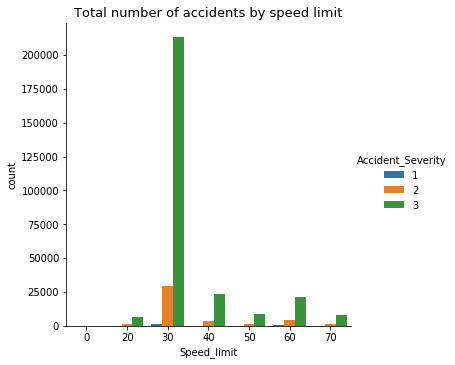

In [23]:
sns.catplot(x = "Speed_limit",hue = "Accident_Severity",kind = "count",data = accident_data)
plt.title("Total number of accidents by speed limit", fontsize = 13)

In [24]:
#Correlation between Accident_Severity and Speed_limit
df_speed = accident_data[['Accident_Severity','Speed_limit']]
df_speed.corr()


,Accident_Severity,Speed_limit
Accident_Severity,1.000000,-0.050009
Speed_limit,-0.050009,1.000000


## Accident of severity by Day of Week

In [25]:
#Check the number of accident within different day of week
accident_data_by_week = accident_data.groupby(['Accident_Severity','Day_of_Week']).size().reset_index(name = 'counts')
accident_data_by_week = accident_data_by_week.pivot_table(
                                                       index ='Day_of_Week',
                                                       columns ='Accident_Severity',
                                                       values ='counts')
accident_data_by_week

Accident_Severity,1,2,3
Day_of_Week,,,
1,315,4607,27896
2,286,5712,40836
3,291,6207,43563
4,278,6120,43596
5,301,6151,43983
6,366,6609,46068
7,329,5536,35080


Text(0.5, 1.0, 'Total number of Accidents by Day of Week')

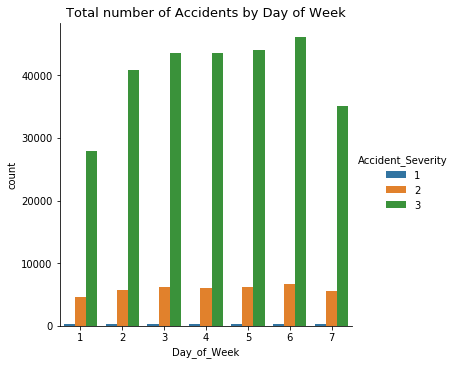

In [26]:
sns.catplot(x = "Day_of_Week",hue = "Accident_Severity",kind ="count",data =accident_data)
plt.title("Total number of Accidents by Day of Week", fontsize = 13)

### Number of accident by day of week

In [27]:
accident_data.groupby(['Day_of_Week']).size().reset_index(name ='counts')


,Day_of_Week,counts
0,1,32818
1,2,46834
2,3,50061
3,4,49994
4,5,50435
5,6,53043
6,7,40945


Text(0.5, 1.0, 'Total number of Accidents by Day of Week')

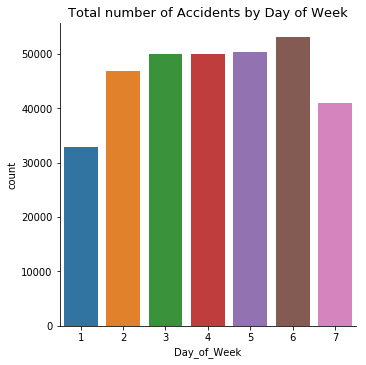

In [28]:
sns.catplot(x ="Day_of_Week",kind ="count",data = accident_data)
plt.title("Total number of Accidents by Day of Week", fontsize = 13)

## Normalized Count of Traffic Accidents by Month

####  In order to account for variations in month length, we made the decision to normalize our monthly data by the number of days in each month.

In [29]:
# set up lists/dicts of months
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 
              'December']
monthLength_list = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
tripleMonthLength_list = [31, 31, 31, 28, 28, 28, 31, 31, 31, 30, 30, 30, 
                          31, 31, 31, 30, 30, 30, 31, 31, 31, 31, 31, 31,
                          30, 30, 30, 31, 31, 31, 30, 30, 30, 31, 31, 31]

In [30]:
# -------------------------------------
# Count of Traffic Accidents by Month
# -------------------------------------

#set up data 
AccidentDataByMonth_df = accident_data.groupby('Month_of_year').agg({'ID':'count'})
AccidentDataByMonth_df = pd.DataFrame(AccidentDataByMonth_df,columns=['ID'])
AccidentDataByMonth_df['Month_of_year'] = AccidentDataByMonth_df.index
AccidentDataByMonth_df['Month Length (Num Days)'] = monthLength_list
AccidentDataByMonth_df['Normalized Accident Count'] = AccidentDataByMonth_df['ID']/AccidentDataByMonth_df['Month Length (Num Days)']
AccidentDataByMonth_df['Normalized Accident Count'] = AccidentDataByMonth_df['Normalized Accident Count'].astype('int')
AccidentDataByMonth_df[['Normalized Accident Count']]

,Normalized Accident Count
Month_of_year,
1,834
2,838
3,835
4,817
5,880
6,914
7,943
8,837
9,943


Text(0.5, 1.0, 'Total number of Accidents by Month of Year')

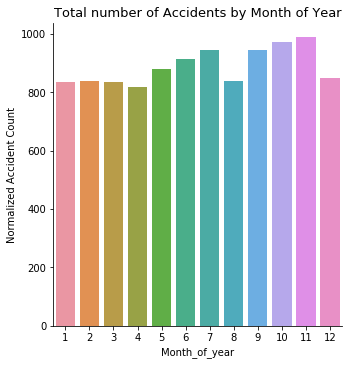

In [34]:
#plot
sns.catplot(x ='Month_of_year',y ='Normalized Accident Count',kind = "bar",data = AccidentDataByMonth_df)
plt.title("Total number of Accidents by Month of Year", fontsize = 13)

#### After normalizing, however, it became apparent that each month had a similar number of accidents. And November got slight higher of number. Upon further research, the most likely explanation is that the much severe weather happen in November led to higher  number of accidents.

## Accident Severity by Month

In [32]:
accSevByMonth_df = accident_data[['ID','Accident_Severity','Month_of_year']]
#Grouped Bar chart of severity by month
accSevByMonth_df = pd.DataFrame(accSevByMonth_df.groupby(['Accident_Severity','Month_of_year']).count()['ID'])
accSevByMonth_df.reset_index(inplace = True)
accSevByMonth_df
accSevByMonth_df[['Month_of_year','Accident_Severity','ID']]
# add month length for normalization                  
accSevByMonth_df['Month Length'] = tripleMonthLength_list
# normalize
accSevByMonth_df['Normalized Accident Count']=accSevByMonth_df['ID']/accSevByMonth_df['Month Length']
accSevByMonth_df['Normalized Accident Count']=accSevByMonth_df['Normalized Accident Count'].astype('int')


##### The most notable trend here was that, while the number of Severity 3 "Slight" accidents varied month-to-month, the number of Severity 2 "Serious" and Severity 1 "Fatal" accidents stayed relatively steady month-to-month.Possible explanations include bias or subjectivity in how police officers categorize accidents or variations in minor accidents due to effects of weather or other seasonal events changes. It would seem, from looking at this data, that looking more closely at the causes of minor accidents could lead to the most actionable data vis-a-vis traffic accident reduction. Further investigation would be needed to determine.

Text(0.5, 1.0, 'Total number of Accidents by Month of Year')

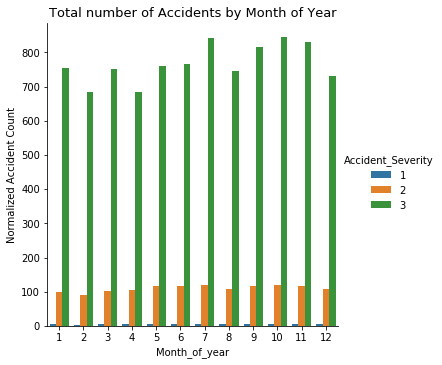

In [33]:
#plot
sns.catplot(x = 'Month_of_year',y = 'Normalized Accident Count',
            hue = "Accident_Severity",kind ="bar",data = accSevByMonth_df)

plt.title("Total number of Accidents by Month of Year", fontsize = 13)

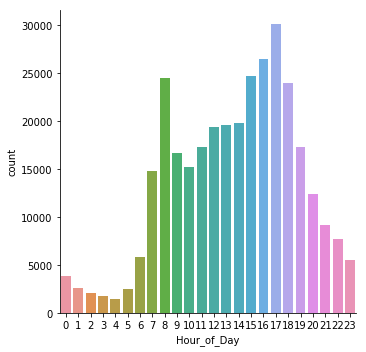

In [36]:
sns.catplot(x = 'Hour_of_Day',kind = 'count',data = accident_data)

In [37]:
# Create dataframe for Casualties by Day of Week and Hour of Day
accidents_by_hour = accident_data.groupby(['Hour_of_Day','Day_of_Week']).agg({'Number_of_Casualties':'sum'})
accidents_by_hour_pivot = accidents_by_hour.pivot_table(values = ['Number_of_Casualties'], 
                                                        index = ['Hour_of_Day'], 
                                                        columns = ['Day_of_Week'])
accidents_by_hour_pivot.columns = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']


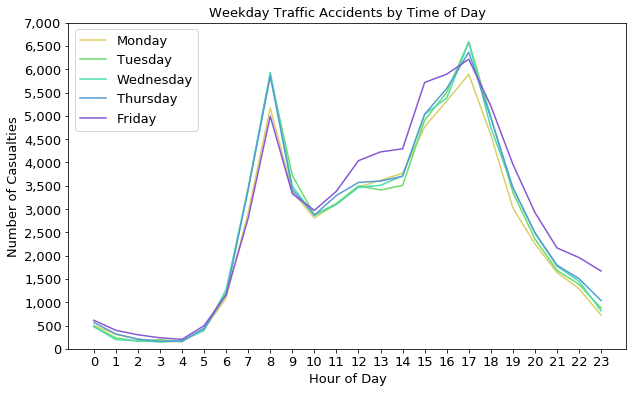

In [38]:
# Create line charts showing trends in the Time of Day and Number of Casualties 
# Set x_axis
x_axis = accidents_by_hour_pivot.index

# Plot each weekday and assigning color to be consistent with previous charts
plt.figure(figsize = (10,6))
plt.plot(x_axis, accidents_by_hour_pivot['Monday'], color ='#DACF68')
plt.plot(x_axis, accidents_by_hour_pivot['Tuesday'], color ='#6CDB69')
plt.plot(x_axis, accidents_by_hour_pivot['Wednesday'], color ='#4CDCAE')
plt.plot(x_axis, accidents_by_hour_pivot['Thursday'], color ='#559BD6')
plt.plot(x_axis, accidents_by_hour_pivot['Friday'], color ='#8757D4')

# Determine y-axis
y_max = 7000
step = 500
y_axis = np.arange(0, y_max+step, step)
# format y-ticks as comma separated
y_axis_fmt = ["{:,.0f}".format(y) for y in y_axis]
# set y-axis limits
plt.ylim(min(y_axis), max(y_axis))

# Format axes ticks and labels
plt.xticks(np.arange(len(x_axis)), x_axis, fontsize = 13)
plt.yticks(y_axis, y_axis_fmt, fontsize = 13)
plt.xlabel('Hour of Day', fontsize = 13)
plt.ylabel('Number of Casualties', fontsize = 13)

plt.legend(fontsize = 13, loc ='upper left')
plt.title("Weekday Traffic Accidents by Time of Day", fontsize = 13)

plt.show()

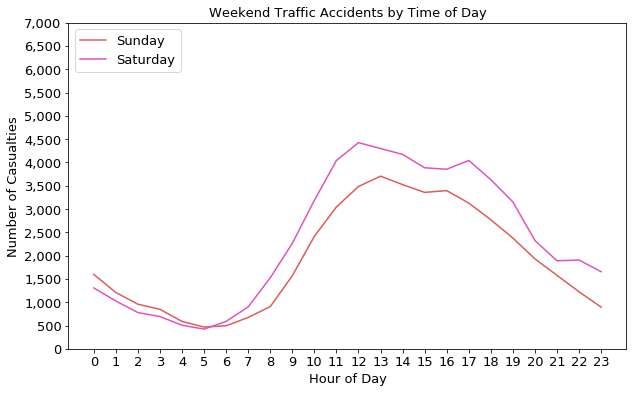

In [39]:
# Plot for Weekends
plt.figure(figsize = (10,6))
plt.plot(accidents_by_hour_pivot['Sunday'], color ='#DD5B58')
plt.plot(accidents_by_hour_pivot['Saturday'], colo r='#DE54BB')

# Determine y-axis
y_max = 7000
step = 500
y_axis = np.arange(0, y_max+step, step)
# format y-ticks as comma separated
y_axis_fmt = ["{:,.0f}".format(y) for y in y_axis]
# set y-axis limits
plt.ylim(min(y_axis), max(y_axis))

# Format axes ticks and labels
plt.xticks(np.arange(len(x_axis)), x_axis, fontsize = 13)
plt.yticks(y_axis, y_axis_fmt, fontsize = 13)
plt.xlabel('Hour of Day', fontsize = 13)
plt.ylabel('Number of Casualties', fontsize = 13)

plt.legend(fontsize=13, loc='upper left')
plt.title("Weekend Traffic Accidents by Time of Day", fontsize = 13)
plt.show()

### Rural vs. Urban Data Visualization and Analysis

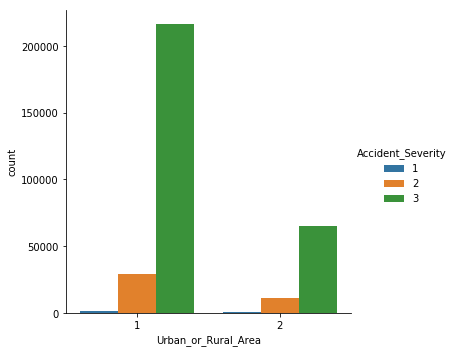

In [41]:
sns.catplot(x = "Urban_or_Rural_Area",hue = "Accident_Severity",kind = "count",data = accident_data)

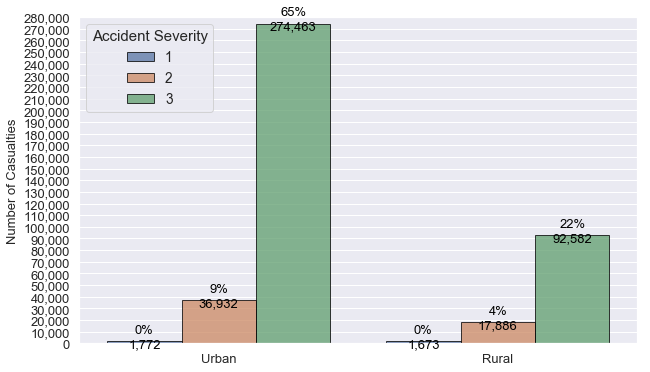

In [74]:
# Create Dataframe for Urban or Rural Area, Road Type and sum for Number of Casualties

# Convert Urban or Rural Area (1 or 2) raw data for respective area

area_type = accident_data.groupby(['Urban_or_Rural_Area',
                                    'Accident_Severity']).sum()['Number_of_Casualties'].to_frame().reset_index()
total_casualties = area_type['Number_of_Casualties'].sum()

area_type['Urban_or_Rural_Area'] = [str('Urban') if value == 1 else str('Rural') if value == 2 else str('Neither') 
                                         for value in area_type['Urban_or_Rural_Area']]



plt.figure(figsize=(10,6))
g = sns.barplot(x ='Urban_or_Rural_Area', y ='Number_of_Casualties', hue = 'Accident_Severity', data = area_type, 
                linewidth = 1, edgecolor ='black', alpha = 0.75)
sns.set_style('darkgrid')

# Determine y-axis
y_max = max(area_type['Number_of_Casualties'])+3000
y_max -= y_max % -10000
step = 10000
y_axis = np.arange(0, y_max+step, step)
# format y-ticks as comma separated
y_axis_fmt = ["{:,.0f}".format(y) for y in y_axis]
# set y-axis limits
plt.ylim(min(y_axis), max(y_axis))

# Format axes ticks and labels
plt.xticks(fontsize = 13)
plt.yticks(y_axis, y_axis_fmt, fontsize = 13)

plt.xlabel('')
plt.ylabel('Number of Casualties', fontsize = 13)

ax = g.axes
for p in ax.patches:
    ax.annotate(s = "{:,.0f}%".format((p.get_height()/total_casualties)*100)+"\n"+("{:,.0f}".format(p.get_height())), 
                xy = ((p.get_x() + p.get_width() / 2., p.get_height()+2000)),
                ha = 'center', va = 'center', color = 'black', xytext = (0, 2), 
                textcoords='offset points', fontsize = 13)  
plt.legend(loc = 'upper left', title = 'Accident Severity', frameon = True)
#plt.title('Total Traffic Accidents by Area', fontsize=13)

plt.show()

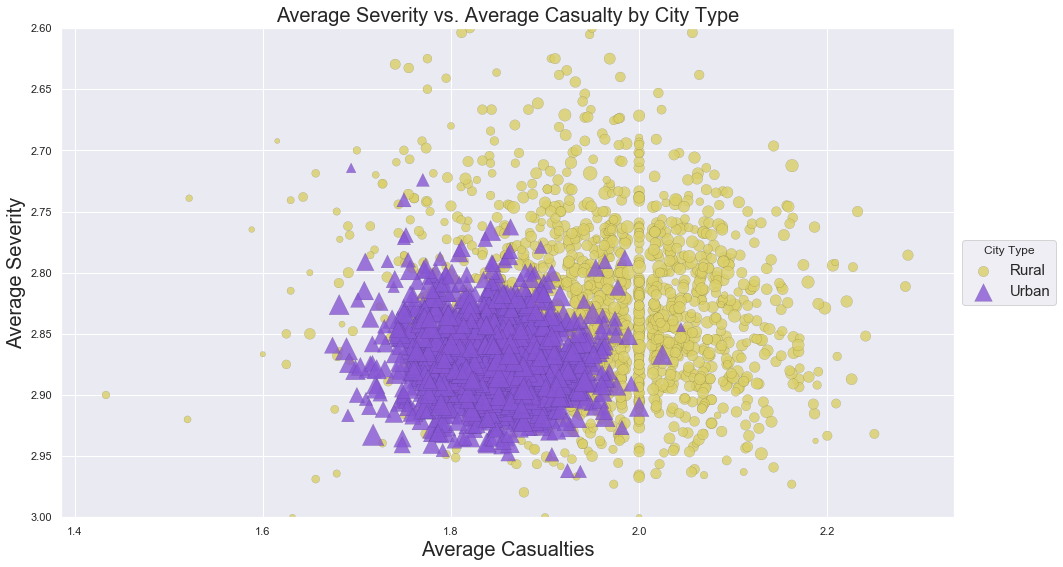

In [93]:
# ----------------------------------------------------------------------
# Rural vs. Urban Data Visualization and Analysis (Charles)
# ----------------------------------------------------------------------

#--------------- Create Data Frames for Urban v. Rural --------------- 
urban = accident_data[accident_data["Urban_or_Rural_Area"] == 1]
rural = accident_data[accident_data["Urban_or_Rural_Area"] == 2]

#--------------- Calculations by City Type --------------- 
rural_mean_1 = rural.groupby(["Date"]).mean()["Accident_Severity"]
rural_mean_2 = rural.groupby(["Date"]).mean()["Number_of_Vehicles"]
rural_count_3 = rural.groupby(["Date"]).count()["ID"]

urban_mean_1 = urban.groupby(["Date"]).mean()["Accident_Severity"]
urban_mean_2 = urban.groupby(["Date"]).mean()["Number_of_Vehicles"]
urban_count_3 = urban.groupby(["Date"]).count()["ID"]

#--------------- Set Parameters for Scatterplot --------------- 
plt.rcParams["figure.figsize"] = [16,9]
sns.set()

plt.title("Average Severity vs. Average Casualty by City Type", size=20)
plt.ylabel("Average Severity", size=20)
plt.xlabel("Average Casualties", size=20)
plt.ylim([3, 2.6])
plt.scatter(rural_mean_2,
            rural_mean_1,
            color = "#DACF68",
            s = rural_count_3*2,
            edgecolor = "black", linewidths = 0.1,
            alpha = 0.8, label = "Rural")

plt.scatter(urban_mean_2,
            urban_mean_1,
            color = "#8757D4",
            s = urban_count_3*2,
            edgecolor = "black", linewidths = 0.1, marker = "^", 
            alpha=0.8, label="Urban")

#--------------- Set Legend --------------- 
plt.legend(title = 'City Type', loc = 'center left', bbox_to_anchor = (1, 0.5), fontsize = 15)

#--------------- Save and Show --------------- 

plt.show()


1.Urban Accidents means throughout the year are typically closer to 3 and casualties are usually closer to 1  This is likely due to the fact that more "fender benders" occur, which are low-intensity low-casualty events.

2.Rural accidents occur much less frequently than urban accidents (on an absolute basis). This makes it possible for high casualty, high severity accidents to influence the overall mean for the day, pushing them higher.

3."One is less likely to get into an accident in a rural setting, but if an accident is to occur it is likely to be more severe."

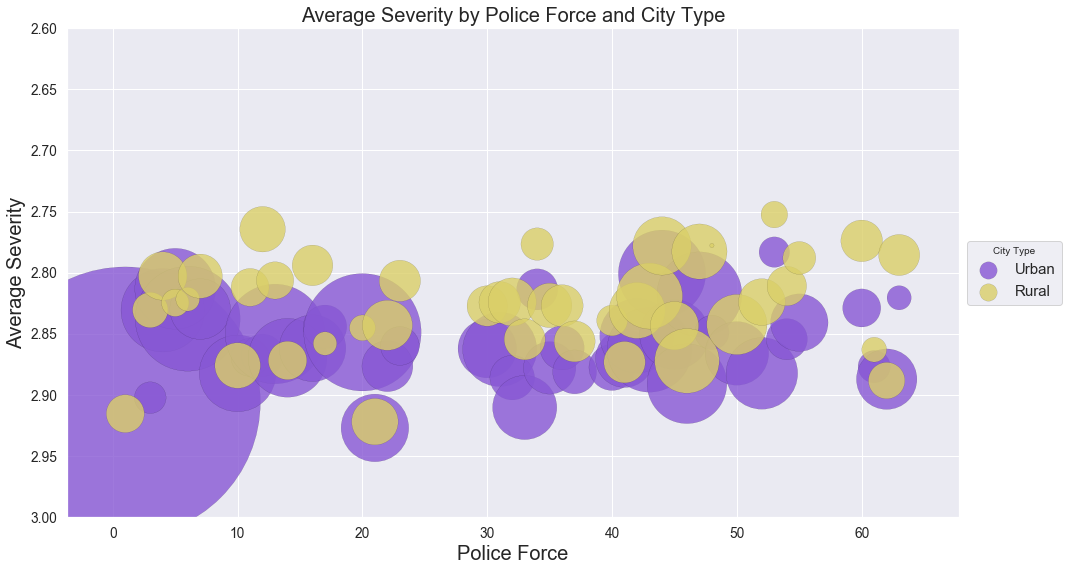

In [150]:
urban = accident_data[accident_data["Urban_or_Rural_Area"] == 1]
rural = accident_data[accident_data["Urban_or_Rural_Area"] == 2]

police_severity_urban = list(urban.groupby(["Police_Force"]).mean()["Accident_Severity"])
police_casualty_urban = list(urban.groupby(["Police_Force"]).count()["Number_of_Vehicles"])
police_force_urban = list(urban["Police_Force"].unique())
police_force_urban.sort()
                             
police_severity_rural = list(rural.groupby(["Police_Force"]).mean()["Accident_Severity"])
police_casualty_rural = list(rural.groupby(["Police_Force"]).count()["Number_of_Vehicles"])
police_force_rural = list(rural["Police_Force"].unique())
police_force_rural.sort()

#--------------- Set Parameters for Scatterplot ---------------
plt.rcParams["figure.figsize"] = [16,9]

plt.title("Average Severity by Police Force and City Type", size = 20)
plt.ylabel("Average Severity", size = 20)
plt.xlabel("Police Force", size = 20)
plt.ylim([3, 2.6])

plt.scatter(police_force_urban,
            police_severity_urban, 
            color ="#8757D4",
            s = police_casualty_urban,
            edgecolor = "black", linewidths = 0.1,
            alpha = 0.8, label ="Urban")


plt.scatter(police_force_rural,
            police_severity_rural, 
            color = "#DACF68",
            s = police_casualty_rural,
            edgecolor = "black", linewidths = 0.1,
            alpha = 0.8, label ="Rural")

#--------------- Set Legend --------------- 
legend = plt.legend(title ='City Type', loc ='center left', bbox_to_anchor = (1, 0.5), fontsize = 15)
legend.legendHandles[0]._sizes = [300]
legend.legendHandles[1]._sizes = [300]

#--------------- Save and Show --------------- 

plt.show()

1.A similar pattern emerges when looking at the data through average severity and rate of casualty continues to be higher in rural settings than urban settings.

2.There does not appear to be a strong correlation between average severity/casualties compared to Police Force.

3.It is evident that some Police Forces encounter far less accidents. Typically, these have a higher tendency of demonstrating a higher average severity/casualty rate.

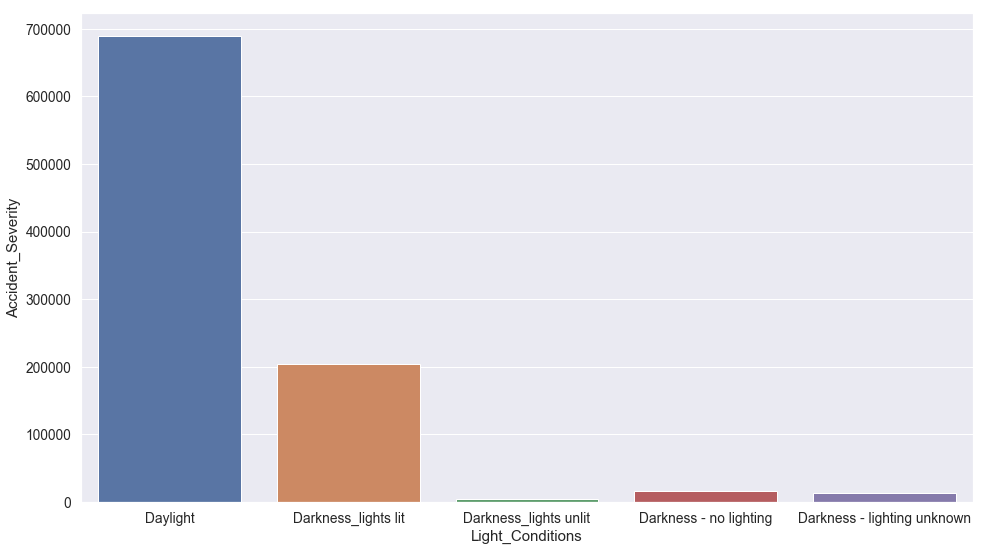

In [119]:
grouper_2 = accident_data[['Light_Conditions','Accident_Severity']]
light_condition_severity = grouper_2.groupby(by = 'Light_Conditions',as_index=False).sum()

light_condition_severity['Light_Conditions'] = [str('Daylight') if value == 1 
                                                else str('Darkness_lights lit') if value == 4 
                                                else str('Darkness_lights unlit') if value == 5
                                                else str('Darkness - no lighting') if value == 6
                                                else str('Darkness - lighting unknown') if value == 7
                                                else str('Neither')
                                               for value in light_condition_severity['Light_Conditions']]

plt = sns.barplot(light_condition_severity['Light_Conditions'],light_condition_severity['Accident_Severity'])

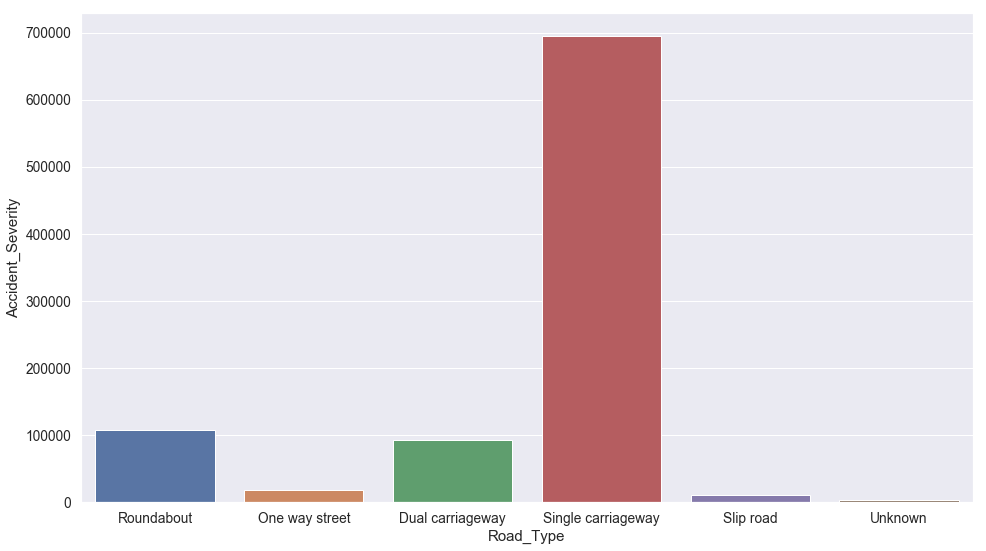

In [121]:
grouper_3 = accident_data[['Road_Type','Accident_Severity']]
road_type_severity = grouper_3.groupby(by = 'Road_Type',as_index = False).sum()

road_type_severity['Road_Type'] = [str('Roundabout') if value == 1 
                                   else str('One way street') if value == 2 
                                   else str('Dual carriageway') if value == 3
                                   else str('Single carriageway') if value == 6
                                   else str('Slip road') if value == 7
                                   else str('Unknown') if value == 9
                                   else str('One way street/Slip road') if value == 12
                                   else str('Neither')
                                   for value in road_type_severity['Road_Type']]


plt = sns.barplot(road_type_severity['Road_Type'],road_type_severity['Accident_Severity'])

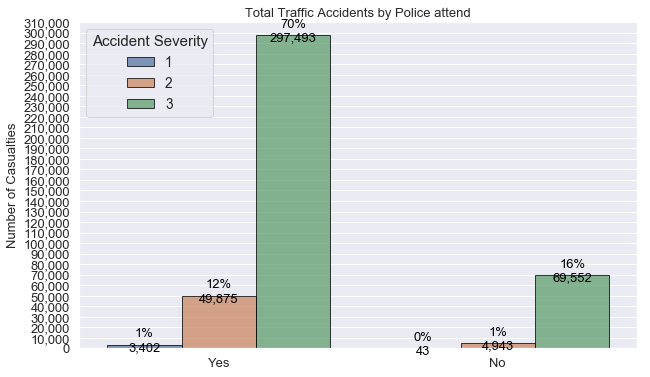

In [115]:
#Create Dataframe for Police_Officer_Attend and sum for Number of Casualties

# Convert olice_Officer_Attend raw data for respective area

police_attend = accident_data.groupby(['Police_Officer_Attend',
                                    'Accident_Severity']).sum()['Number_of_Casualties'].to_frame().reset_index()
total_casualties = police_attend['Number_of_Casualties'].sum()

police_attend['Police_Officer_Attend'] = [str('Yes') if value == 1 else str('No') if value == 2 else str('Neither') 
                                         for value in police_attend['Police_Officer_Attend']]



plt.figure(figsize=(10,6))
g = sns.barplot(x ='Police_Officer_Attend', y ='Number_of_Casualties', hue = 'Accident_Severity', data = police_attend, 
                linewidth = 1, edgecolor ='black', alpha = 0.75)
sns.set_style('darkgrid')

# Determine y-axis
y_max = max(police_attend['Number_of_Casualties'])+5000
y_max -= y_max % -10000
step = 10000
y_axis = np.arange(0, y_max+step, step)
# format y-ticks as comma separated
y_axis_fmt = ["{:,.0f}".format(y) for y in y_axis]
# set y-axis limits
plt.ylim(min(y_axis), max(y_axis))

# Format axes ticks and labels
plt.xticks(fontsize = 13)
plt.yticks(y_axis, y_axis_fmt, fontsize = 13)

plt.xlabel('')
plt.ylabel('Number of Casualties', fontsize = 13)

ax = g.axes
for p in ax.patches:
    ax.annotate(s = "{:,.0f}%".format((p.get_height()/total_casualties)*100)+"\n"+("{:,.0f}".format(p.get_height())), 
                xy = ((p.get_x() + p.get_width() / 2., p.get_height()+2000)),
                ha = 'center', va = 'center', color = 'black', xytext = (0, 2), 
                textcoords='offset points', fontsize = 13)  
plt.legend(loc = 'upper left', title = 'Accident Severity', frameon = True)
plt.title('Total Traffic Accidents by Police attend', fontsize=13)

plt.show()

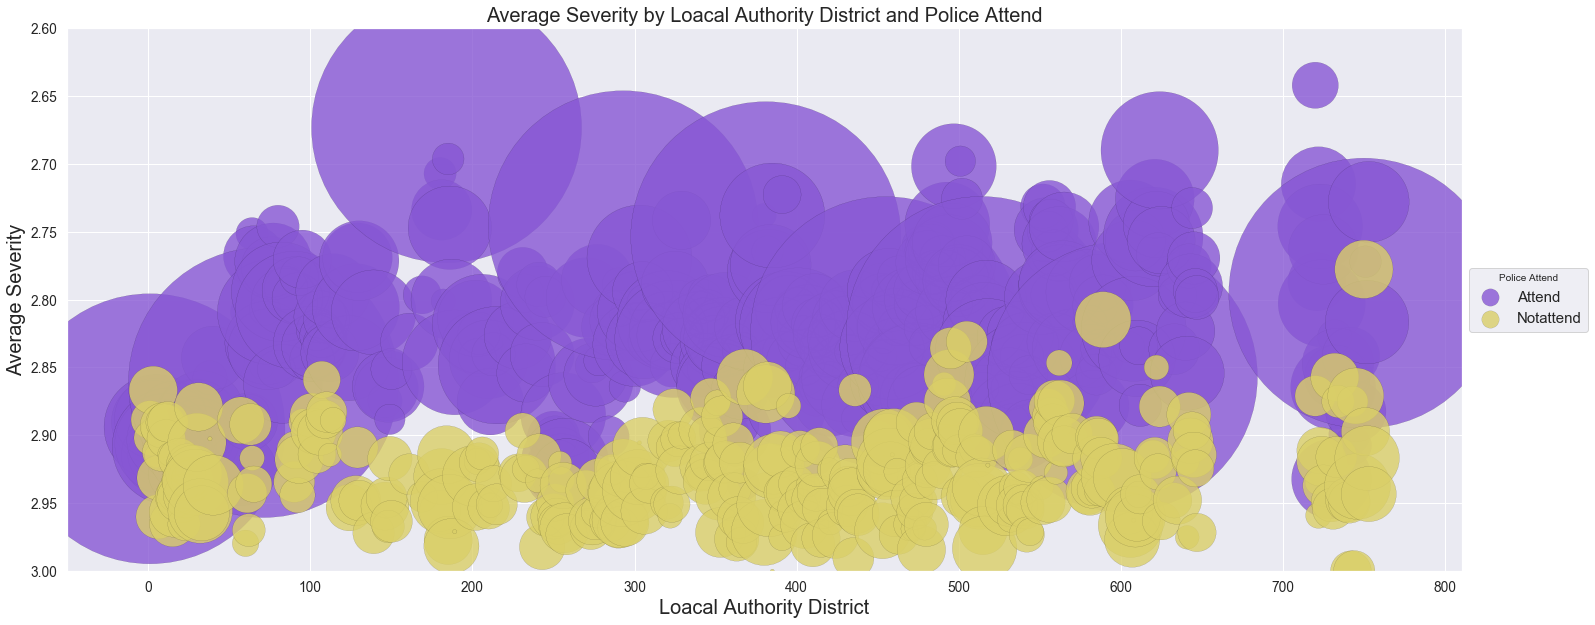

In [157]:
Attend = accident_data[accident_data["Police_Officer_Attend"] == 1]
Notattend = accident_data[accident_data["Police_Officer_Attend"] == 2]

la_severity_attend = list(Attend.groupby(["Local_Authority_(District)"]).mean()["Accident_Severity"])
la_casualty_attend = list(Attend.groupby(["Local_Authority_(District)"]).count()["Number_of_Vehicles"])
la_police_attend = list(Attend["Local_Authority_(District)"].unique())
la_police_attend.sort()
                             
la_severity_notattend = list(Notattend.groupby(["Local_Authority_(District)"]).mean()["Accident_Severity"])
la_casualty_notattend = list(Notattend.groupby(["Local_Authority_(District)"]).count()["Number_of_Vehicles"])
la_police_unattend = list(Notattend["Local_Authority_(District)"].unique())
la_police_unattend.sort()

#--------------- Set Parameters for Scatterplot ---------------
plt.rcParams["figure.figsize"] = [25,10]_

plt.title("Average Severity by Loacal Authority District and Police Attend", size = 20)
plt.ylabel("Average Severity", size = 20)
plt.xlabel("Loacal Authority District", size = 20)
plt.ylim([3, 2.6])

plt.scatter(la_police_attend,
            la_severity_attend, 
            color ="#8757D4",
            s = police_casualty_urban,
            edgecolor = "black", linewidths = 0.1,
            alpha = 0.8, label ="Attend")


plt.scatter(la_police_unattend,
            la_severity_notattend, 
            color = "#DACF68",
            s = police_casualty_rural,
            edgecolor = "black", linewidths = 0.1,
            alpha = 0.8, label ="Notattend")

#--------------- Set Legend --------------- 
legend = plt.legend(title ='Police Attend', loc ='center left', bbox_to_anchor = (1, 0.5), fontsize = 15)
legend.legendHandles[0]._sizes = [300]
legend.legendHandles[1]._sizes = [300]

#--------------- Save and Show --------------- 

plt.show()

It is apparent that there is no difference of police officer attend rate compared to Local Authority district

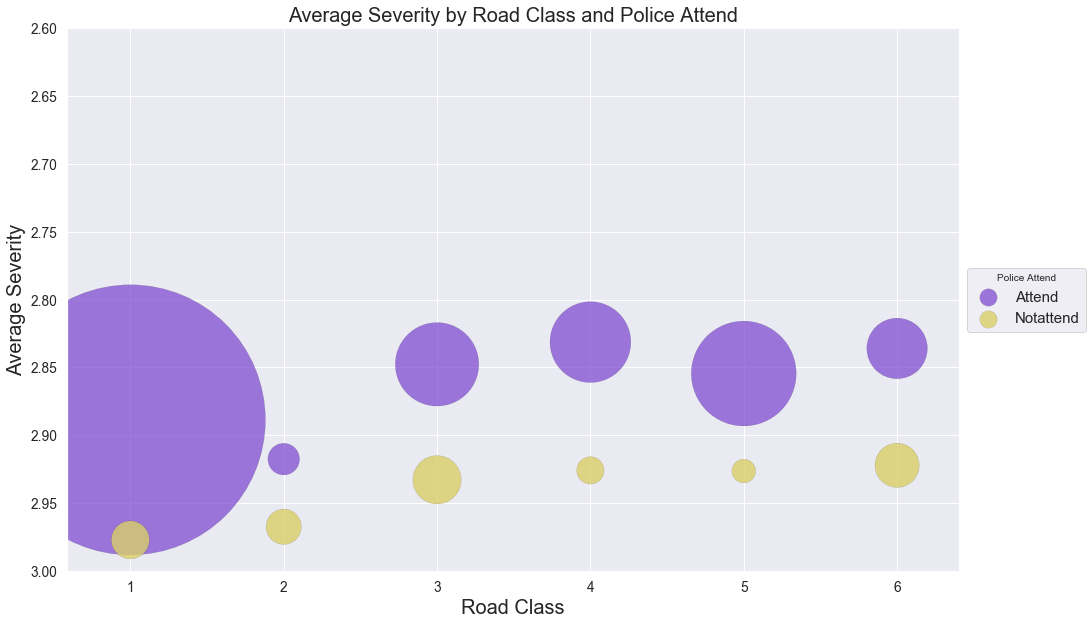

In [159]:
Attend = accident_data[accident_data["Police_Officer_Attend"] == 1]
Notattend = accident_data[accident_data["Police_Officer_Attend"] == 2]

rdclass_severity_attend = list(Attend.groupby(["1st_Road_Class"]).mean()["Accident_Severity"])
rdclass_casualty_attend = list(Attend.groupby(["1st_Road_Class"]).count()["Number_of_Vehicles"])
rdclass_police_attend = list(Attend["1st_Road_Class"].unique())
rdclass_police_attend.sort()
                             
rdclass_severity_notattend = list(Notattend.groupby(["1st_Road_Class"]).mean()["Accident_Severity"])
rdclass_casualty_notattend = list(Notattend.groupby(["1st_Road_Class"]).count()["Number_of_Vehicles"])
rdclass_police_unattend = list(Notattend["1st_Road_Class"].unique())
rdclass_police_unattend.sort()

#--------------- Set Parameters for Scatterplot ---------------
plt.rcParams["figure.figsize"] = [16,10]

plt.title("Average Severity by Road Class and Police Attend", size = 20)
plt.ylabel("Average Severity", size = 20)
plt.xlabel("Road Class", size = 20)
plt.ylim([3, 2.6])

plt.scatter(rdclass_police_attend,
            rdclass_severity_attend, 
            color ="#8757D4",
            s = police_casualty_urban,
            edgecolor = "black", linewidths = 0.1,
            alpha = 0.8, label ="Attend")


plt.scatter(rdclass_police_unattend,
            rdclass_severity_notattend, 
            color = "#DACF68",
            s = police_casualty_rural,
            edgecolor = "black", linewidths = 0.1,
            alpha = 0.8, label ="Notattend")

#--------------- Set Legend --------------- 
legend = plt.legend(title ='Police Attend', loc ='center left', bbox_to_anchor = (1, 0.5), fontsize = 15)
legend.legendHandles[0]._sizes = [300]
legend.legendHandles[1]._sizes = [300]

#--------------- Save and Show --------------- 

plt.show()

Under Road class 1 "Motorway", the police office attend rate is higher 

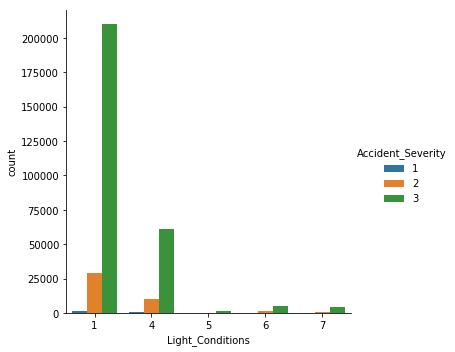

In [43]:
sns.catplot(x='Light_Conditions',hue="Accident_Severity",kind="count",data=accident_data)

In [45]:
category_list=['Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'Latitude',
 'Police_Force',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Day_of_Week',
 'Local_Authority_(District)',
 'Local_Authority_(Highway)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Road_Type',
 'Speed_limit',
 'Junction_Detail',
 'Junction_Control',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Ped_Cross_Human',
 'Ped_Cross_Physical',
 'Light_Conditions',
 'Urban_or_Rural_Area',
 'Police_Officer_Attend',
 'Month_of_year',
 'Hour_of_Day']

accident_cordata = accident_data[category_list]


The Spearman correlation is a nonparametric measure of the monotonicity of the relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed

In [97]:
# Calculate the correlation of accident data dataset
spearmat = stats.spearmanr(accident_data)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [109]:
spearmat

SpearmanrResult(correlation=array([[ 1.00000000e+00, -3.83509362e-02, -8.39298687e-02,
        -3.86800102e-02, -8.32748294e-02,  2.42837090e-01,
        -8.97890493e-03,  2.10823655e-02,  3.38666642e-03,
         1.88508582e-03, -7.69735362e-03,  2.41413083e-01,
         5.79845546e-02,  3.72390299e-02,  5.49579246e-03,
        -1.60950193e-02,  4.49039465e-02, -2.21530685e-02,
         4.05837943e-02,  4.01776671e-02, -4.55578117e-03,
         2.79419255e-03, -2.94516713e-02, -1.21528340e-02,
         7.62810220e-02,  1.76343342e-02,  2.10602870e-01,
        -2.33474997e-03, -6.24916452e-03],
       [-3.83509362e-02,  1.00000000e+00, -3.68978415e-01,
         9.99613273e-01, -3.76558475e-01, -2.25151028e-01,
         4.09002397e-02, -3.57272930e-02, -7.46208108e-02,
        -3.16126549e-03,  3.29835386e-04, -2.36024074e-01,
         1.77223788e-01, -9.86296188e-02, -4.92218412e-02,
         2.11722510e-02, -5.67479244e-02, -2.38860116e-02,
        -1.92986415e-02, -5.84197606e-02, -1

Text(0.5, 1.0, 'Accident Correlation')

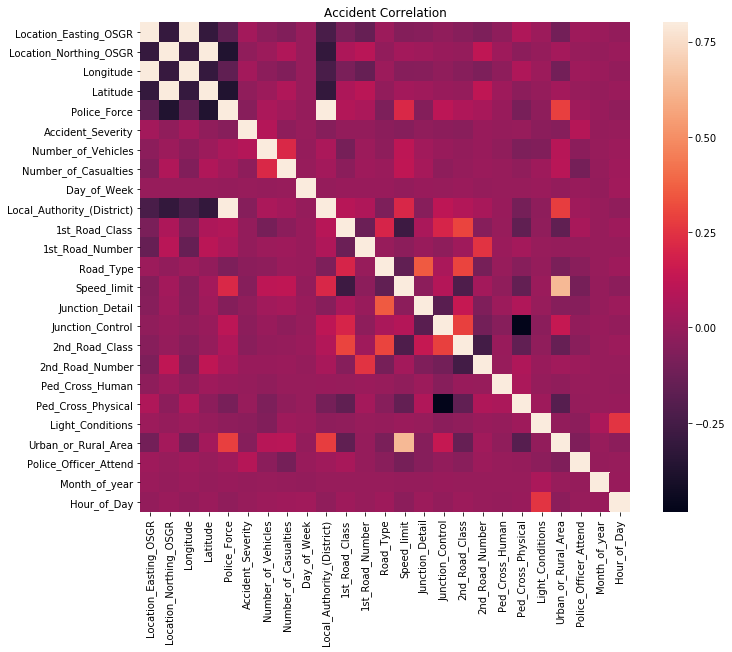

In [47]:
f,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat,vmax =.8,square = True)
plt.title("Accident Correlation")

The next step was to plot a Pearson correlation matrix to identify the amount of linear relationship be-tween variables in order to gain insight into data and to determine whether linear based algorithms are suitable. The matrix is color-coded - a value of one is represented by beige and shows a completely positive linear correlation. Dark purple represents a zero that suggests no linear correlation. As seen by the graph, there no linear relationships present,from all variables shown here.Absence of other linear relationships can be explained by the fact that almost everything is a categorical variable. Even the Police officer atted barely achieve 0.1 on the Pearson correlation as they are nominal features as well. Hence there is no justification and indication to use predictive models based on linearity

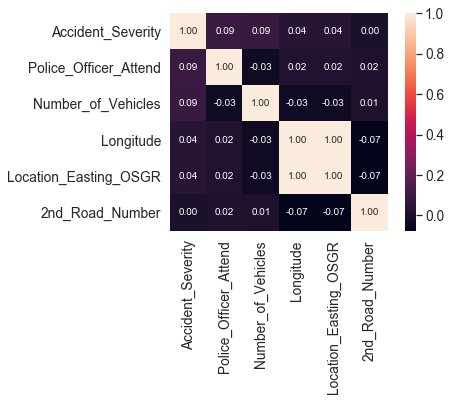

In [105]:
k = 6 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Accident_Severity')['Accident_Severity'].index
cm = np.corrcoef(accident_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt ='.2f', 
                 annot_kws={'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

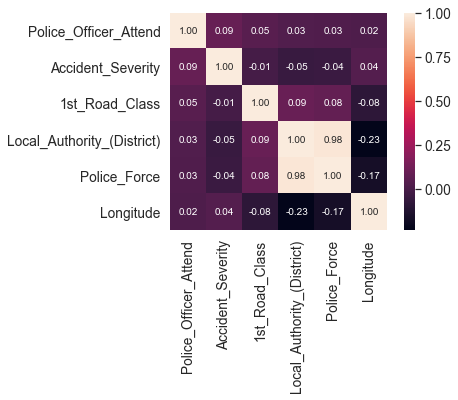

In [49]:
k = 6 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Police_Officer_Attend')['Police_Officer_Attend'].index
cm = np.corrcoef(accident_cordata[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [170]:
stats.spearmanr(accident_data['Police_Officer_Attend'], accident_data['1st_Road_Class'])

SpearmanrResult(correlation=0.04800062154605869, pvalue=1.2878370884458726e-164)

In [171]:
stats.spearmanr(accident_data['Police_Officer_Attend'], accident_data['Local_Authority_(District)'])

SpearmanrResult(correlation=0.03233782101230716, pvalue=9.876928960329887e-76)

In [131]:
#Create table of dummy variables for relevant columns
dummies = pd.get_dummies(accident_data[['Light_Conditions',
                                'Road_Type','1st_Road_Class']])
dummies = pd.concat([accident_data[['Local_Authority_(District)',
                            'Number_of_Casualties','Accident_Severity',
                            'Day_of_Week','Hour_of_Day']], dummies],axis=1)

#Reset index
dummies.reset_index(inplace=True)
dummies.drop('index',axis=1,inplace=True)

#Add row for national totals
dummySum = dummies.sum(axis=0)
dummies = dummies.append(dummySum.transpose(),ignore_index=True)
dummies.loc[len(dummies)-1,'Local_Authority_(District)'] = 'National Total'
dummies.fillna(value=0,inplace=True)

### One hot Coding

In [371]:
# create a list of category columns 

categorical_cols=['Accident_Severity','Local_Authority_(District)',
                 '1st_Road_Class','Road_Type','Speed_limit','Junction_Detail', 
                'Junction_Control','Ped_Cross_Human',
                'Ped_Cross_Physical','Light_Conditions','Urban_or_Rural_Area',
                  'Police_Officer_Attend']

X=accident_data[categorical_cols]

# #One Hot Coding
enc = OneHotEncoder()
onehotlabels=enc.fit_transform(X).toarray()
onehotlabels

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 1., 0.]])

### Hypothesis testing

In [451]:
import scipy as sp
import scipy.stats as stats

##### Null Hypothesis: Number of daily accidents between 2014 and 2015 are same

In [211]:
df_year=accident_data.groupby(['Date','Year']).size().reset_index(name = 'counts')

df_year

,Date,Year,counts
0,1/1/12,12,126
1,1/1/13,13,147
2,1/1/14,14,123
3,1/1/15,15,117
4,1/10/12,12,241
5,1/10/13,13,239
6,1/10/14,14,294
7,1/10/15,15,291
8,1/11/12,12,260
9,1/11/13,13,302


In [221]:
df_15 = df_year.loc[df_year['Year'] == 15]
#df_15['counts']

In [222]:
df_14 = df_year.loc[df_year['Year'] == 14]
#df_14['counts']

In [223]:
stats.ttest_ind(np.array(df_14['counts']), np.array(df_15['counts']), equal_var = False)

Ttest_indResult(statistic=4.401087563375204, pvalue=1.2391168603886414e-05)

##### The p-value is significant, therefore one can reject the null hypothesis in support of the alternative.

##### Null hypothesis:Number of accidents in summer and winter are equal

In [176]:
accident_data['Season'] = accident_data['Month_of_year'].apply(lambda x: ( x%12 + 3 )//3)

In [219]:
df_season = accident_data.groupby(['Date','Season']).count()['ID'].to_frame().reset_index()

df_season


,Date,Season,ID
0,1/1/12,1,126
1,1/1/13,1,147
2,1/1/14,1,123
3,1/1/15,1,117
4,1/10/12,4,241
5,1/10/13,4,239
6,1/10/14,4,294
7,1/10/15,4,291
8,1/11/12,4,260
9,1/11/13,4,302


In [225]:
df_1 = df_season.loc[df_season['Season'] == 1]
#df_1['ID']

In [226]:
df_3 = df_season.loc[df_season['Season'] == 3]
#df_3['ID']

In [227]:
stats.ttest_ind(np.array(df_1['ID']), np.array(df_3['ID']), equal_var = False)

Ttest_indResult(statistic=-4.141412351342808, pvalue=3.9241512894851935e-05)

##### The p-value is significant, therefore one can reject the null hypothesis in support of the alternative.